# KINETIC DISSOLUTION OF QUARTZ
http://hydrochemistry.eu/exmpls/kin_qu.html

In [1]:
%pylab inline
import phreeqpython
from scipy.integrate import odeint
pp = phreeqpython.PhreeqPython('phreeqc.dat')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Phreeqc Calculation

### Dissolution Rate Function

The following function describes the dissolution rate of quartz.

In [2]:
def ratefun(sol, quartz_dissolved, m0, A0, V):
    m = m0-quartz_dissolved
    rate = (A0/V)*(m/m0)**0.67*10**-13.7*(1-sol.sr("Quartz"))
    return rate * 1e3

## Calculation

In [3]:
solution1 = pp.add_solution({})

t = np.array([])
y = []

year = 365*24*3600

for time, sol in solution1.kinetics('SiO2', 
                                    rate_function=ratefun, 
                                    time=np.linspace(0,5*year, 15), 
                                    m0=158.5, 
                                    args=(23.13,0.16)):
    t = np.append(t, time)
    y.append(sol.total_element('Si', units='mmol'))

### Plotting the Results

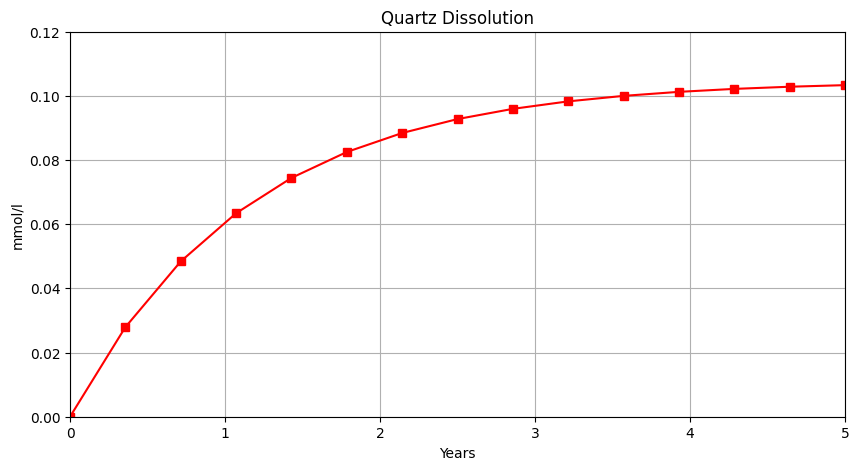

In [4]:
plt.figure(figsize=[10,5])
plt.plot(t/year,y, 'rs-')
plt.xlim([0,5])
plt.ylim([0,0.12])
plt.xlabel('Years')
plt.ylabel('mmol/l')
plt.title('Quartz Dissolution')
plt.grid()

### Dissolution Calculation using odeint

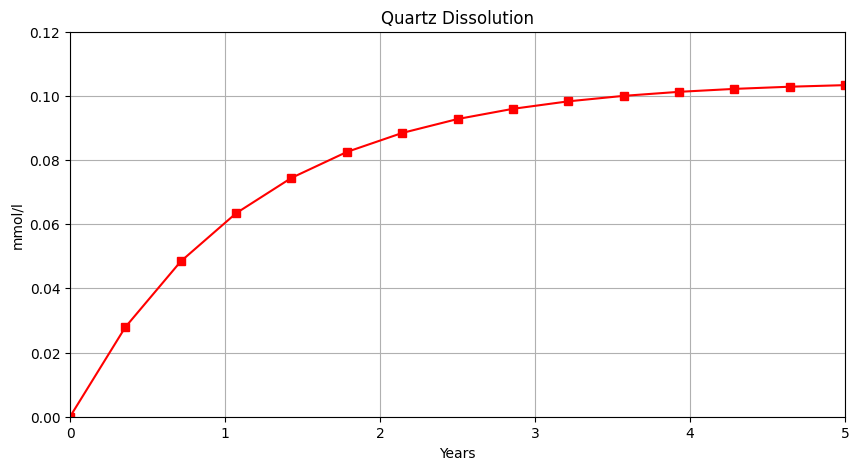

In [5]:
def rate_quartz(quartz_dissolved,time, sol, A0, V, m0):
    temp = sol.copy() # make a temporary copy of the solution
    temp.add('SiO2', quartz_dissolved[0], 'mol') # add SiO2 to the solution
    m = m0-quartz_dissolved[0]
    rate = (A0/V)*(m/m0)**0.67*10**-13.7*(1-temp.sr("Quartz")) # calculate the dissolution rate    
    temp.forget() # cleanup the no longer needed temporary solution
    return rate

solution1 = pp.add_solution({})
year = 365*24*3600 # seconds

tt = np.linspace(0, 5*year, 15)

# solve differential equation
yy = odeint(rate_quartz,0,t, args=(solution1, 23.13, 0.16, 158.5))

plt.figure(figsize=[10,5])
plt.plot(tt/year,yy*1e3, 'rs-')
plt.xlim([0,5])
plt.ylim([0,0.12])
plt.xlabel('Years')
plt.ylabel('mmol/l')
plt.title('Quartz Dissolution')
plt.grid()